<a href="https://colab.research.google.com/github/thejaswinigk2003/Data-science-Machine-Failue-Prediction/blob/main/thejaswini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics as metrices

In [ ]:
import pandas as pd
df = pd.read_csv('/content/data(1).csv')
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [ ]:
df.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [ ]:
df.describe(include="all")

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [ ]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
df.tail()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


In [ ]:
from sklearn.model_selection import train_test_split
parameters_cols = ['footfall','tempMode','AQ','USS','CS','VOC','RP','IP','Temperature']
x = df[parameters_cols]
y = df.fail
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(755, 9)

(189, 9)

(755,)

(189,)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn import metrics as metrices
conf_metrics = metrices.confusion_matrix(y_test, y_pred)
print("Confusion Metrics:",conf_metrics)
Accuracy_score = metrices.accuracy_score(y_test, y_pred)
print("Accuracy Score:",Accuracy_score)
print('Accuracy in Percentage: ',int(Accuracy_score*100),'%')

Confusion Metrics: [[87 15]
 [10 77]]
Accuracy Score: 0.8677248677248677
Accuracy in Percentage:  86 %


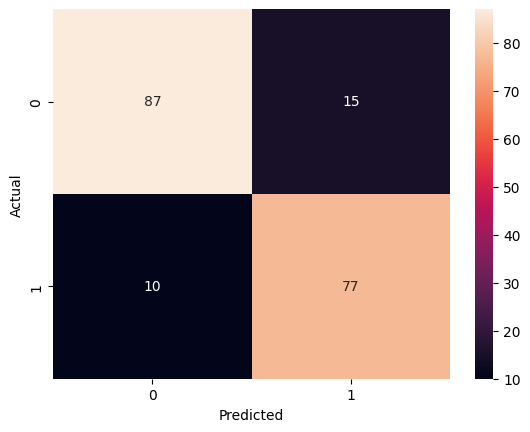

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_metrics=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
heat_map=sns.heatmap(conf_metrics,annot=True)
plt.show()
